## Exploratory Descriptive Analysis of yoga and wellbeing searchs

Coming from a personal interest in Yoga, I want to understand more about the patterns in search related with yoga and other wellbeing terms as: Meditation, Mindfulness, Sleep and Insomnia

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pytrends.request import TrendReq
%matplotlib notebook

In [48]:
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['Yoga', 'Meditation',  'Mindfulness','Sleep', 'Insomnia']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 5-y', #For months only available 1,2,3 months 'today 3-m'
     geo='',
     gprop='')
data = pytrend.interest_over_time()
data = data.drop(labels=['isPartial'],axis='columns')
data=data.reset_index()
data=data[data['date']>'2015-12-31']
data=data.set_index('date')

Yoga and Sleep are the terms with the highest search index. Between 2017 and until mid of 2019 those search had a similar trend, then the Yoga search has decreased significatevly and the Sleep one is having a little upward trend. The other terms keep a similar distribution through the time.

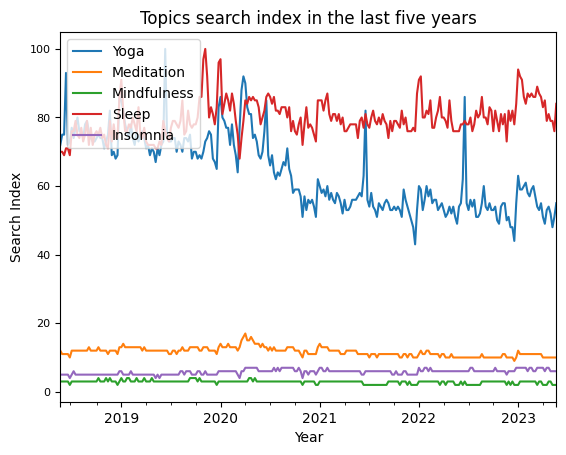

In [49]:
%matplotlib inline 
data.plot(title = 'Topics search index in the last five years'); #; To remove the message
plt.xlabel('Year')
plt.ylabel('Search Index')
plt.yticks(size=8)
plt.legend(loc='upper left')
plt.show()

# Yoga search components

Focus on the yoga search components (Youtube, images and web)

In [50]:
pytrend = TrendReq(hl='en-US', tz=360)
components=['images', 'youtube', ''] #the '' empty is associated with web search
keywords = ['Yoga']
results=[]
for component in components:
    pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 5-y', #For months only available 1,2,3 months 'today 3-m'
     geo='',
     gprop=component)
    results.append(pytrend.interest_over_time())

In [51]:
df_ima_yout=pd.merge(results[0], results[1], on='date', how='left').drop(['isPartial_x', 'isPartial_y'], axis=1)
df_ima_yout.columns=['Images', 'YouTube']
df_web=results[2].drop('isPartial', axis=1)
df_web.columns=['Web']
df=pd.merge(df_web, df_ima_yout, on='date', how='left')

The web search index reflect a downward trend in the last year. For images search there are some high points (seasonality) and a similar trend through the last five years and Youtube search has changed completely the decreasing trend between 2017 and starting of 2020, when the index search reflect a significatevely increase.

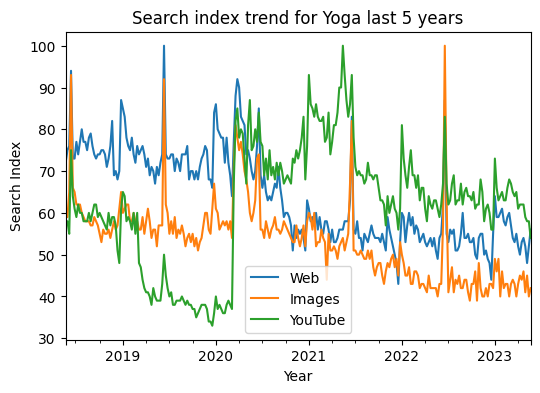

In [53]:
df.plot(figsize=(6,4))
plt.xlabel('Year')
plt.ylabel('Search Index')
plt.title('Search index trend for Yoga last 5 years')
plt.show()

In [54]:
df=df.reset_index()
df=df.rename(columns={'date': 'Week'})

In [55]:
df['Month'] = pd.DatetimeIndex(df['Week']).month
df['Year'] = pd.DatetimeIndex(df['Week']).year
df=df[df['Year']>2016]

In [56]:
df=df[['Year','Month','YouTube', 'Web', 'Images']].groupby(['Year', 'Month']).agg('mean')

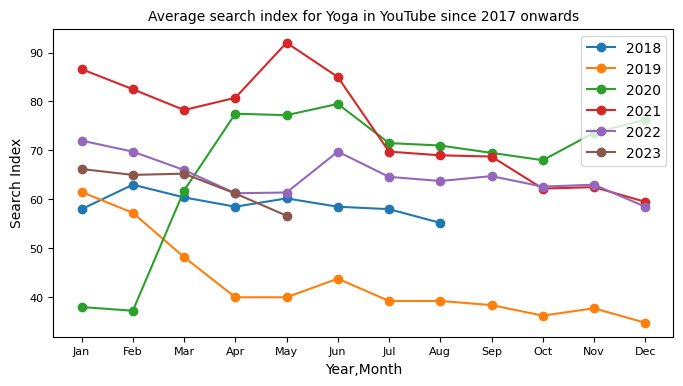

In [57]:
%matplotlib inline 
grouped = df.groupby('Year')
fig, ax = plt.subplots(figsize=(8, 4))

for name, group in grouped:
    group['YouTube'].plot(ax=ax, marker='o', linestyle='-', label=name)

plt.ylabel('Search Index')
plt.legend(loc=0) 
plt.title('Average search index for Yoga in YouTube since 2017 onwards',size=10) 
plt.xticks(np.arange(0,12,1), ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], size=8)
plt.yticks(size=8)
plt.show()
